In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
from sql_to_df import retrieve_data

/Users/Home/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/Home/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
df = retrieve_data("AAPL")

In [3]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
        
    result = np.array(result)
    train_rows = round(0.9 * result.shape[0])
    train = result[:int(train_rows), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(train_rows):, :-1]
    y_test = result[int(train_rows):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [4]:
window = 10
X_train, y_train, X_test, y_test = load_data(df, window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (4117, 10, 4)
y_train (4117,)
X_test (457, 10, 4)
y_test (457,)


In [5]:
def build_model(layers):
    model = Sequential()
    model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu', kernel_initializer="uniform"))        
    model.add(Dense(1, activation="linear", kernel_initializer="uniform"))
    model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
    return model

model = build_model([4,window,1])

In [6]:
model.fit(
    X_train,
    y_train,
    batch_size=64,
    nb_epoch=50,
    validation_split=0.1,
    verbose=1)

/Users/Home/anaconda/lib/python3.6/site-packages/keras/models.py:939: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 3705 samples, validate on 412 samples
Epoch 1/50
3705/3705 [==============================] - 4s 1ms/step - loss: 1215.2627 - acc: 0.0000e+00 - val_loss: 10843.9416 - val_acc: 0.0000e+00
Epoch 2/50
3705/3705 [==============================] - 2s 635us/step - loss: 907.9376 - acc: 0.0000e+00 - val_loss: 8439.1041 - val_acc: 0.0000e+00
Epoch 3/50
3705/3705 [==============================] - 2s 649us/step - loss: 559.3428 - acc: 2.6991e-04 - val_loss: 5812.5241 - val_acc: 0.0000e+00
Epoch 4/50
3705/3705 [==============================] - 2s 658us/step - loss: 191.3115 - acc: 2.6991e-04 - val_loss: 3208.0810 - val_acc: 0.0000e+00
Epoch 5/50
3705/3705 [==============================] - 2s 643us/step - loss: 60.2868 - acc: 2.6991e-04 - val_loss: 1841.8487 - val_acc: 0.0000e+00
Epoch 6/50
3705/3705 [==============================] - 3s 680us/step - loss: 23.7631 - acc: 0.0000e+00 - val_loss: 1205.7879 - val_acc: 0.0000e+00
Epoch 7/50
3705/3705 [==============================] - 3s 69

In [7]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 34.20 MSE (5.85 RMSE)
Test Score: 2614.81 MSE (51.14 RMSE)


In [8]:
p = model.predict(X_test)
print(p)

[[92.42421 ]
 [92.43425 ]
 [92.3923  ]
 [92.3645  ]
 [92.37878 ]
 [92.392944]
 [92.45755 ]
 [92.46162 ]
 [92.478424]
 [92.44355 ]
 [92.37903 ]
 [92.351166]
 [92.34824 ]
 [92.3246  ]
 [92.198685]
 [92.13052 ]
 [92.10488 ]
 [92.100365]
 [92.11543 ]
 [91.78639 ]
 [91.526924]
 [91.471405]
 [91.53148 ]
 [91.64178 ]
 [91.75517 ]
 [91.787445]
 [91.80054 ]
 [91.90249 ]
 [92.026695]
 [92.10092 ]
 [92.1855  ]
 [92.19731 ]
 [92.29068 ]
 [92.33915 ]
 [92.39995 ]
 [92.43912 ]
 [92.46648 ]
 [92.46168 ]
 [92.44475 ]
 [92.381996]
 [92.31062 ]
 [92.64863 ]
 [92.73761 ]
 [92.78547 ]
 [92.851364]
 [92.865555]
 [92.90399 ]
 [92.9475  ]
 [92.98608 ]
 [93.026245]
 [93.04785 ]
 [93.06834 ]
 [93.07448 ]
 [93.06935 ]
 [93.0791  ]
 [93.09895 ]
 [93.099556]
 [93.10501 ]
 [93.10518 ]
 [93.104996]
 [93.10188 ]
 [93.102486]
 [93.09619 ]
 [93.09332 ]
 [93.08535 ]
 [93.070145]
 [93.06044 ]
 [93.0597  ]
 [93.07377 ]
 [93.07777 ]
 [93.08035 ]
 [93.06793 ]
 [93.0056  ]
 [92.99802 ]
 [93.05661 ]
 [93.07731 ]
 [93.11678 ]

In [9]:
diff=[]
ratio=[]
for u in range(len(y_test)):
    predicted = p[u][0]
    ratio.append((y_test[u]/predicted)-1)
    diff.append(abs(y_test[u]- predicted))
    print(u, y_test[u], predicted, (y_test[u]/predicted)-1, abs(y_test[u]- predicted))

0 96.5756 92.42421 0.044916699028068274 4.151390405273432
1 96.0967 92.43425 0.03962221932786836 3.662450122070311
2 94.4353 92.3923 0.022112193944134217 2.042996533203123
3 95.2367 92.3645 0.031096340976673575 2.872198046874999
4 95.3344 92.37878 0.03199461564743644 2.9556234497070335
5 96.7124 92.392944 0.046750925572380364 4.319455664062502
6 96.4387 92.45755 0.043059219599366205 3.981149951171872
7 96.2237 92.46162 0.04068805657568286 3.7620834838867125
8 96.2433 92.478424 0.04071085732162105 3.76487592773438
9 94.8946 92.44355 0.02651401733516079 2.4510498901367157
10 94.5526 92.37903 0.02352884327978555 2.173571679687498
11 94.8262 92.351166 0.026800248896044154 2.475034228515625
12 93.888 92.34824 0.016673368379370945 1.539756286621099
13 93.1355 92.3246 0.008783138820461112 0.8108997802734308
14 92.8716 92.198685 0.0072985347878047335 0.6729153076171883
15 92.5257 92.13052 0.004289309368574967 0.3951763183593755
16 93.1844 92.10488 0.011720537481825222 1.0795187133789028
17 93.

286 149.344 93.58194 0.5958634805297125 55.76206030273437
287 149.5831 93.59451 0.5982037333402894 55.98858706054688
288 148.2784 93.60938 0.5840121559934175 54.669017370605474
289 149.2942 93.61453 0.5947758970726253 55.679667529296864
290 151.1866 93.616875 0.6149503013515856 57.56972530517578
291 152.4415 93.6181 0.6283335708636955 58.82339697265624
292 146.7048 93.61919 0.567037758382587 53.08561359863282
293 148.5871 93.62807 0.5869931392864645 54.95903298339843
294 147.5314 93.62051 0.5758449281221529 53.9108937133789
295 147.8103 93.62001 0.578832339436794 54.19028962402345
296 155.5289 93.61571 0.661354748297488 61.913192602539056
297 154.3936 93.628494 0.6490022745299613 60.76510573730468
298 155.0608 93.627914 0.65613856664579 61.43288557128906
299 157.6304 93.62721 0.6835959946890076 64.00318747558595
300 158.467 93.63347 0.6924183448730137 64.83353137207033
301 154.63 93.62005 0.6516761360372005 61.00995147705078
302 156.07 93.639175 0.6667169409410896 62.43082458496093
303

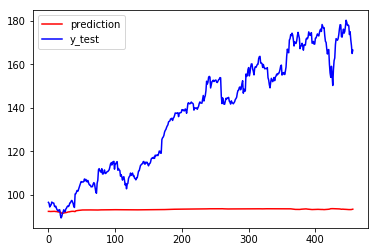

In [10]:
import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()